<a href="https://colab.research.google.com/github/carexoid/7-semester/blob/master/neaural_networks/Module1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd

In [3]:
np.set_printoptions(precision=2)

In [4]:
data = pd.read_csv("/content/data/telecom_churn.csv", sep=',')

In [5]:
type(data)

pandas.core.frame.DataFrame

**1.**

In [6]:
data.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


**2.**

In [7]:
data.shape

(3333, 20)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

In [9]:
data.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


Пропусків немає

**3.**

In [10]:
data["Churn"] = data.Churn.astype("int64", errors="ignore")

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

**4.**

In [12]:
data.sort_values("Account length")

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
923,MS,1,415,No,No,0,144.8,107,24.62,112.5,66,9.56,218.7,79,9.84,13.8,3,3.73,1,0
1838,IA,1,408,No,Yes,26,208.0,115,35.36,185.0,113,15.73,177.7,144,8.00,8.1,9,2.19,1,0
1490,TN,1,415,No,No,0,196.1,107,33.34,296.5,82,25.20,211.5,91,9.52,7.0,2,1.89,1,0
2960,TX,1,415,No,No,0,182.1,106,30.96,134.9,106,11.47,152.3,75,6.85,10.0,3,2.70,5,1
2423,SC,1,408,No,No,0,123.8,113,21.05,236.2,77,20.08,73.2,81,3.29,3.7,2,1.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1886,ID,224,510,No,No,0,111.4,133,18.94,175.0,66,14.88,217.2,106,9.77,5.5,6,1.49,3,0
1751,WY,225,415,No,No,0,182.7,142,31.06,246.5,63,20.95,218.0,103,9.81,8.8,2,2.38,1,0
1551,MI,225,415,No,No,0,165.4,106,28.12,273.7,109,23.26,210.0,93,9.45,8.7,3,2.35,0,1
1408,NM,232,408,No,No,0,165.6,104,28.15,195.9,115,16.65,118.3,77,5.32,11.8,3,3.19,1,0


**5.**

In [17]:
data[(data["Churn"] == 0) & (data["International plan"] == "No")]["Total intl minutes"].max()

18.9

**6.**

In [19]:
data["Total charge"] = data["Total day charge"] + data["Total eve charge"] + data["Total night charge"]

In [20]:
data.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,Total charge
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0,72.86
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0,55.54
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0,59.00
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0,65.02
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0,49.36


**7.**

In [21]:
top_10_total_charge = data.sort_values(by='Total charge', ascending=False)[:10]

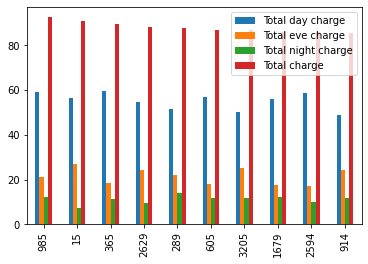

In [23]:
top_10_total_charge.plot(y=['Total day charge', 'Total eve charge', 'Total night charge', 'Total charge'], kind='bar')

**8.**

In [24]:
from keras.utils.vis_utils import plot_model
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense

In [25]:
visible = Input(shape=(8,))
hidden1 = Dense(15, activation='linear')(visible)
hidden2 = Dense(10, activation='linear')(hidden1)
hidden3 = Dense(15, activation='linear')(hidden2)
hidden4 = Dense(20, activation='linear')(hidden3)
output = Dense(1, activation='sigmoid')(hidden4)
model  = Model(inputs=visible, outputs = output)

In [26]:
print(model.summary())

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 8)]               0         
_________________________________________________________________
dense (Dense)                (None, 15)                135       
_________________________________________________________________
dense_1 (Dense)              (None, 10)                160       
_________________________________________________________________
dense_2 (Dense)              (None, 15)                165       
_________________________________________________________________
dense_3 (Dense)              (None, 20)                320       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 21        
Total params: 801
Trainable params: 801
Non-trainable params: 0
_______________________________________________________________

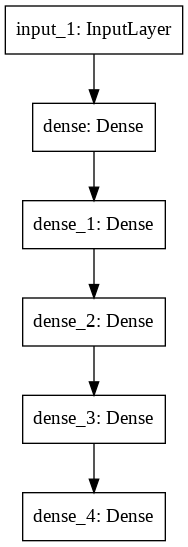

In [27]:
plot_model(model)